# Норма матрица

**Садржај:**
1. [Траг матрице](#Траг-матрице)
1. [Фробенијусова норма](#Фробенијусова-норма)
1. [Норма трага (Nuclear norm)](#Норма-трага-(Nuclear-norm))
1. [Норма индукована векторском нормом](#Норма-индукована-векторском-нормом)
1. [Кондициони број матрице](#Кондициони-број-матрице)

In [1]:
import numpy as np
import numpy.random as rndm
import scipy.linalg as spl
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import ortho_group

## Траг матрице

**Дефиниција 1.** Траг квадартне аматрице $A=[a_{ij}]\in\mathcal{M}_{n\times n}$ је збир њених дијагоналних елемената, тј. ${\rm tr}(A)=\displaystyle\sum_{i=1}^na_{ii}.$

**Пример 1.** Кроз пример матрице мале димензије упознаћемо особине функције трага, ${\rm tr}:\mathcal{M}_{n\times n}\mapsto\mathbb{R}.$ 

In [2]:
A=np.arange(9).reshape(3,3)
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [3]:
np.trace(A)

12

Имајући у виду да се дијагонални елементи квадратне матрице не померају приликом транспоновања, закључујемо да је 
$${\rm tr}(A)={\rm tr}(A^T).$$

In [4]:
np.trace(A.T)

12

Траг матрице показује и особину линеарности,
$${\rm tr}(\alpha A+\beta B)=\alpha\, {\rm tr}(A)+\beta\, {\rm tr}(B).$$

In [5]:
B=rndm.rand(3,3)
np.trace(B)

1.8062445560413611

In [6]:
np.trace(3*A-2*B)==3*np.trace(A)-2*np.trace(B)

True

***

Најважније особине трага матрице дате су наредним тврђењима.

**Теорема 1.**     За квадратну матрицу $A=[a_{ij}]$ реда $n$ са сопственим вредностима $\lambda_0,\lambda_1,\dots,\lambda_{n-1},$ важи
$${\rm tr}(A)=\lambda_0+\lambda_1+\dots+\lambda_{n-1}.$$

**Пример 2.** Упоредићемо вредности трага и збира сопствених вредности матрице $A=\begin{bmatrix}a&b\\c&d\end{bmatrix}.$
Сопствене вредности $\lambda_1,\lambda_2$ матрице $A$ су нуле њеног карактеристичног полинома. 

\begin{align}
P_A(\lambda)&=\det(A-\lambda I)=\begin{vmatrix}a-\lambda&b\\c&d-\lambda\end{vmatrix}
=(a-\lambda)(d-\lambda)-bc=\lambda^2-\underbrace{(a+d)}_{{\rm tr}(A)}\lambda+\underbrace{ad-bc}_{\det(A)},\\
P_A(\lambda)&=(\lambda-\lambda_1)(\lambda-\lambda_2)=\lambda^2-(\lambda_1+\lambda_2)\lambda+\lambda_1\,\lambda_2
\end{align}

На основу Вијетових формула закључујемо да је ${\rm tr}(A)=\lambda_1+\lambda_2$ и $\det(A)=\lambda_1\lambda_2.$ Кроз израчунавања можемо да проверимо сличне једнакости за матрице већих димензија.

In [7]:
A=rndm.rand(7,7)
spektar=np.linalg.eigvals(A)

np.round(np.linalg.det(A)-np.prod(spektar),3)

(-0+0j)

In [8]:
np.round(np.trace(A)-np.sum(spektar),3)

0j

***

**Пример 3.** Нека су $A,B\in\mathcal{M}_{m\times n}$ правоугаоне матрице истих димензија са елементима $A=[a_{ij}],\ B=[b_{ij}].$ Производи матрица $A^TB\in\mathcal{M}_{n\times n}$ и $AB^T\in\mathcal{M}_{m\times m}$ су матрице различитих димензија. Па ипак, ови производи имају нешто заједничко.  Потражићемо израз трагова  ${\rm tr}(A^TB)$ и ${\rm tr}(AB^T).$

Дијагонални елементи матрица чије трагове тражимо су:
\begin{align}
(A^TB)_{jj}&=
\begin{bmatrix}a_{0j}&a_{1j}&\dots&a_{m-1\,j}\end{bmatrix}
\begin{bmatrix}b_{0j}\\b_{1j}\\\vdots\\b_{m-1\,j}\end{bmatrix}
=\displaystyle\sum_{i\in(m)}a_{ij}b_{ij},\\
{\rm tr}(A^TB)&=\displaystyle\sum_{j\in(n)}(A^TB)_{jj}=\displaystyle\sum_{j\in(n)}\sum_{i\in(m)}a_{ij}b_{ij}
,\\
(AB^T)_{ii}&=\begin{bmatrix}a_{i0}&a_{i1}&\dots&a_{i\,n-1}\end{bmatrix}
\begin{bmatrix}b_{i0}\\b_{i1}\\\vdots\\b_{i\,n-1}\end{bmatrix}
=\displaystyle\sum_{j\in(n)}a_{ij}b_{ij},\\
{\rm tr}(AB^T)&=\displaystyle\sum_{i\in(m)}\sum_{j\in(n)} a_{ij}b_{ij}
=\displaystyle\sum_{j\in(n)}\sum_{i\in(m)} a_{ij}b_{ij}
={\rm tr}(A^TB).
\end{align}

***

**Пример 4.** Нека су $A,B\in\mathcal{M}_{n\times n}$ квадратне матрице истих димензија са елементима $A=[a_{ij}],\ B=[b_{ij}].$ Производи матрица $AB,BA\in\mathcal{M}_{m\times m}$ су поново квадратне матрице и у општем случају су различите међу собом. Потражићемо израз трагова  ${\rm tr}(AB)$ и ${\rm tr}(BA).$

Дијагонални елементи матрица чије трагове тражимо су:
\begin{align}
(AB)_{jj}&=
\begin{bmatrix}a_{j0}&a_{j1}&\dots&a_{j\,n-1}\end{bmatrix}
\begin{bmatrix}b_{0j}\\b_{1j}\\\vdots\\b_{n-1\,j}\end{bmatrix}
=\displaystyle\sum_{i\in(n)}a_{ji}b_{ij},\\
{\rm tr}(AB)&=\displaystyle\sum_{j\in(n)}(AB)_{jj}=\displaystyle\sum_{j\in(n)}\sum_{i\in(n)}a_{ji}b_{ij},\\
(BA)_{ii}&=\begin{bmatrix}b_{i0}&b_{i1}&\dots&b_{i\,n-1}\end{bmatrix}
\begin{bmatrix}a_{0i}\\a_{1i}\\\vdots\\a_{n-1\,i}\end{bmatrix}
=\displaystyle\sum_{j\in(n)}a_{ji}b_{ij},\\
{\rm tr}(AB)&=\displaystyle\sum_{i\in(n)}\sum_{j\in(n)} a_{ji}b_{ij}
={\rm tr}(BA).
\end{align}

***

Особина показана у примеру 4 може се уопштити и на правоугаоне матрице. Неопходно је обезбедити постојање производа у оба смера $AB$ и $BA.$

**Последица 1.** Нека су $A\in\mathcal{M}_{m\times n}$ и $B\in\mathcal{M}_{n\times m}$ правоугаоне матрице. Тада је
$${\rm tr}(AB)={\rm tr}(BA).$$

**Доказ:**

Приметимо да су $A,B^T\in\mathcal{M}_{m\times n}$ па за њих важи показано у примеру 3, ${\rm tr}(X^TY)={\rm tr}(XY^T):$
$${\rm tr}(A^TB^T)={\rm tr}\big(A(B^T)^T\big)={\rm tr}(AB),\qquad {\rm tr}\big((B^T)^TA\big)={\rm tr}(BA)={\rm tr}(B^TA^T).$$
С обзиром да је за квадратне матрице ${\rm tr}(X^T)={\rm tr}(X),$ то је
$${\rm tr}(AB)={\rm tr}(B^TA^T)$$
па закључујемо да једнакост ${\rm tr}(AB)={\rm tr}(BA)$ заиста важи$.\quad\Box$

***

## Фробенијусова норма

Скаларни производ на скупу правоугаоних матрица веома се природно уводи векторизацијом ових дводимезионалних објеката. За две матрице $A,B\in\mathcal{M}_{m\times n},$ са елементима $A=[a_{ij}],\ B=[b_{ij}]$ скаларни производ је 
$$A\cdot B=\sum_{i\in(m)}\sum_{j\in(n)}a_{ij}b_{ij}={\rm tr}(A^TB)={\rm tr}(AB^T)={\rm tr}(B^TA).$$

Норма матрица индукована овим скаларним производом назива се Фробенијусова норма.
$$\|A\|_{F}=\sqrt{A\cdot A}=\sqrt{{\rm tr}(A^TA)}=\sqrt{{\rm tr}(AA^T)}=\sqrt{\sum_{i\in(m)}\sum_{j\in(n)}a_{ij}^2}.$$

Јасно је да се због начина увођења скаларни производ матрица на скупу вектора, тј. на скупу $\mathcal{M}_{n\times1}$ поклапа са стандардним скаларним производом. Такође, Фробенијусова норма се на скупу вектора поклапа са Еуклидовом нормом.

Још један начин тумачења овог израза јесте кроз векторе-врста и векторе-колона матрице $A.$ Уколико уведемо ознаке 
$$A=\left[\begin{array}{c|c|c|c}
	\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
	u_0&u_1&\dots&u_{n-1}\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
	\end{array}\right]=
\left[\begin{array}{c}
\phantom{WW}v_0^T\phantom{WW}\\\hline
\phantom{WW}v_1^T\phantom{WW}\\\hline
\vdots\\\hline
\phantom{WW}v_{m-1}^T\phantom{WW}
\end{array}\right],$$ 
Фробенијусова норма је тада Еуклидова норма вектора Еуклидових норми вектора-врста или вектора-колона,
$$\|A\|_F=\sqrt{\|u_0\|^2+\|u_1\|^2+\dots+\|u_{n-1}\|^2}=\sqrt{\|v_0\|^2+\|v_1\|^2+\dots+\|v_{m-1}\|^2}.\tag{1}$$

Одатле тривијално следи да је $\|A\|_F=\|A^T\|_F.$

Исти закључак добијамо на основу једнакости из примера 3:
$$\|A\|_F^2={\rm tr}\big(A^TA\big)={\rm tr}\big(AA^T\big)={\rm tr}\big((A^T)^TA^T\big)=\|A^T\|_F^2$$

**Последица 2.** Фробенијусова норма ортогоналне матрице димензије $n$ једнака је $\sqrt{n}.$

**Доказ:**

Ортогонална матрица $Q$ димензије $n$ за колоне има ортонормирану базу простора $\mathbb{R}^n.$ Због тога све колоне имају норму $1.$ На основу једнакости $(1)$ закључујемо да је $\|Q\|_F=\sqrt{n}.\quad\Box$

***

**Пример 5.** Проверићемо норму ортогоналне матрице случајно изабране димензије.

In [9]:
n=rndm.randint(100,400)
Q=ortho_group.rvs(n)

np.linalg.norm(Q,'fro'), n**0.5

(17.0, 17.0)

***

**Последица 3.** Фробенијусова норма јединичне матрице димензије $n,\ I_n$ једнака је $\sqrt{n}.$

**Пример 6.** Проверићемо норму јединичне матрице  случајно изабране димензије.

In [10]:
n=rndm.randint(100,400)

np.linalg.norm(np.eye(n),'fro'), n**0.5

(11.224972160321824, 11.224972160321824)

***

Имајући у виду везу између трага и спектра квадратне матрице, долазимо до још једног израза за Фробенијусову норму матрица. Означимо $\lambda_0,\lambda_1,\dots,\lambda_{n-1}$ сопствене вредности матрице $A^TA$ и $\sigma_0,\sigma_1,\dots,\sigma_{r-1},$ сингуларне вредности матрице $А.$ $r$ је ранг матрице $A,$ односно ранг матрица $A^TA$ и $AA^T.$ Тада је
$$\|A\|_F^2={\rm tr}(A^TA)={\lambda_0+\lambda_1+\dots+\lambda_{n-1}}=\sigma_0^2+\sigma_1^2+\dots+\sigma_{r-1}^2,$$
$$\|A\|_F=\sqrt{{\rm tr}(A^TA)}=\sqrt{\sigma_0^2+\sigma_1^2+\dots+\sigma_{r-1}^2}.$$
Фробенијусова норма представља и Еуклидову норму вектора сингуларних вредности матрице.

**Пример 7.** Проверићемо везу $\|A\|_F=\sqrt{{\rm tr}(A^TA)}=\sqrt{\lambda_0+\lambda_1+\dots+\lambda_{n-1}}=\sqrt{\sigma_0^2+\sigma_1^2+\dots+\sigma_{r-1}^2}$ на матрици мале димензије.

In [11]:
A=rndm.rand(7,23)
np.linalg.norm(A,'fro')

7.832949883240977

In [12]:
sigma=spl.svdvals(A)
np.sqrt(np.sum(sigma**2))

7.832949883240977

In [13]:
np.sum(np.linalg.eigvalsh(A@A.T))**0.5

7.832949883240977

In [14]:
np.sum(np.linalg.eigvalsh(A.T@A))**0.5

7.832949883240978

***

**Пример 8.** Нека су $u\in\mathbb{R}^m$ и $v\in\mathbb{R}^n$ произвољни ненула вектори. Потражимо Фробенијусову норму матрице ранга $1,$ $M=uv^T.$ То можемо да урадимо на два начина: преко трага и преко SVD.

**1. начин:**

$$\|M\|_F^2={\rm tr}(M^TM)={\rm tr}(vu^Tuv^T)={\rm tr}\big(v(u^Tu)v^T\big)
=(u^Tu){\rm tr}\big(vv^T\big)=(u^Tu){\rm tr}\big(v^Tv\big)=(u^Tu)(v^Tv)
=\|u\|^2\,\|v\|^2$$
$$\Longrightarrow\qquad \|M\|_F=\|u\|\,\|v\|.$$

**2. начин:**

Нека су $u^{\ast}=\dfrac{u}{\|u\|}$ и $v^{\ast}=\dfrac{v}{\|v\|}$ одговарајући нормирани вектори у односу на $l_2$ норму.
$$M=uv^T=\big(\|u\|\,u^{\ast}\big)\big(\|v\|\,v^{\ast T}\big)=\|u\|\|v\|\,\big(u^{\ast}v^{\ast T}\big)
=u^{\ast}\,\big(\|u\|\|v\|\big)\,v^{\ast T}.$$
Последња једнакост представља редуковану SVD матрице $M.$ Једина сингуларна вредност матрице $M$ је производ норми вектора $\sigma_0=\|u\|\|v\|.$

Због тога је и Фробенијусова норма једнака том производу, $\|M\|_F=\sqrt{\sigma_0^2}=\sigma_0=\|u\|\|v\|.$

In [15]:
m=rndm.randint(15,115)
n=rndm.randint(15,115)
u=rndm.normal(2,2,m)
v=rndm.uniform(-1,1,n)
M=np.outer(u,v)
sing_vr=spl.svdvals(M)
np.round(sing_vr[sing_vr>1e-13],3)

array([102.341])

In [16]:
np.linalg.norm(u)*np.linalg.norm(v)

102.34124471717968

In [17]:
np.linalg.norm(M,'fro')

102.34124471717966

In [18]:
n=rndm.randint(15,115)
u=rndm.normal(2,2,n)
v=rndm.uniform(-1,1,n)
M=np.outer(u,v)
sing_vr=spl.svdvals(M)
np.round(sing_vr[sing_vr>1e-13],3)

array([65.636])

In [19]:
np.linalg.norm(u)*np.linalg.norm(v)

65.63553105252416

In [20]:
np.linalg.norm(M,'fro')

65.63553105252417

***

Осим своје везе са декомпозицијом матрица на сингуларне вредности и векторе, Фробенијусова норма показује повезаност са операцијом множења матрица кроз Еуклидову норму вектора. 

**Лема 1.** Нека је $A\in\mathcal{M}_{m\times n}$ матрица и $v\in\mathbb{R}^n,$ и $\|\cdot\|$ ознака за Еуклидову норму вектора. Тада важи
$$\|Av\|\leq\|A\|_F\|v\|.$$

Особину $(1)$ зовемо слагање Фробенијусове норме са Еуклидовом нормом. 

**Доказ :**

Означимо компоненте матрице $A=[a_{ij}]$ и вектора $v=[x_i]_{n\times 1}.$ Тада је $i-$та компонента вектора $Av$ дата са $(Av)_i=\displaystyle\sum_{j\in(n)}a_{ij}x_j.$ Због тога целокупан вектор $Av$ гласи
$$Av=\begin{bmatrix} \displaystyle\sum_{j\in(n)}a_{0j}x_j\\
	\displaystyle\sum_{j\in(n)}a_{1j}x_j\\ \vdots\\
	\displaystyle\sum_{j\in(n)}a_{m-1\,j}x_j\end{bmatrix}.$$

Следи да је $\|Av\|^2=\displaystyle\sum_{i\in(m)} \left(\sum_{j\in(n)}a_{ij}x_j\right)^2.$ 
Имајући у виду Шварцову неједнакост $$|\langle v,u\rangle|\leq\|v\|\ \|u\|\quad\Longleftrightarrow\quad 
|\langle v,u\rangle|^2\leq\|v\|^2\ \|u\|^2,$$ 
за све $i=0,1,\dots,m-1,$ имамо
$$\left(\sum_{j\in(n)}a_{ij}x_j\right)^2
	\leq\left(\sum_{j\in(n)}a_{ij}^2\right)
	\left(\sum_{j\in(n)}x_{j}^2\right)=
	\left(\sum_{j\in(n)}a_{ij}^2\right)\|v\|^2.$$
Сумирањем по $i\in(m),$ лако долазимо до неједнакости
$$\|Av\|^2\leq\left(\displaystyle\sum_{i\in(m)}\sum_{j\in(n)}a_{ij}^2\right)\|v\|^2=
	\|A\|_{F}^2\|v\|^2.\quad\Box$$  

***

**Последица 4.** Када се норма матрице слаже са нормом вектора за матричну норму важи
$$\forall A\in\mathcal{M}_{n\times n}\quad \|A\|\geq\rho(A),$$
где је $\rho(A)$ спектрални полупречник матрице.

**Доказ :**

Претпоставимо да за неку матричну норму важи неједнакост 
$$\|Av\|\leq\|A\|\,\|v\|\tag{1}.$$
Нека је $\lambda$ доминантна сопствена вредност и $v$ одговарајући сопствени вектор. Тада је
$$\|Av\|=|\lambda|\,\|v\|=\rho(A)\,\|v\|\leq\|A\|\,\|v|.\quad\Box$$

***

На основу неједнакости $(1)$ за Фробенијусову и $l_2$ норму добијамо наредно уопштење овог тврђења.  Такву особину зовемо суб-мултипликативност матричне норме.

**Теорема 2.** За матрице $A\in\mathcal{M}_{m\times n}$ и $B\in\mathcal{M}_{n\times p}$ важи
$$\|AB\|_{F}\leq\|A\|_{F}\|B\|_{F}.\tag{2}$$

**Доказ :**

Представимо производ две матрице кроз производе матрице $A$ и колоне матрице $B,$
$$AB=A\left[\begin{array}{c|c|c|c}
	\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
	w_0&w_1&\dots&w_{p-1}\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
	\end{array}\right]=
    \left[\begin{array}{c|c|c|c}
	\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
	Aw_0&Aw_1&\dots&Aw_{p-1}\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
	\end{array}\right].$$
Тада је 
\begin{align}
\|AB\|_F^2&=\|Aw_0\|^2+\|Aw_1\|^2+\dots+\|Aw_{p-1}\|^2\\
&\leq\|A\|_F^2\|w_0\|^2+\|A\|_F^2\|w_1\|^2+\dots+\|A\|_F^2\|w_{p-1}\|^2
=\|A\|_F^2\big(\|w_0\|^2+\|w_1\|^2+\dots+\|w_{p-1}\|^2\big)\\
&=\|A\|_F^2\|B\|_F^2.\quad\Box
\end{align}

***

**Пример 9.** Проверићемо суб-мултипликативност на примеру случајно генерисаних матрица $A\in\mathcal{M}_{7\times7},\ B\in\mathcal{M}_{7\times23}.$

In [21]:
A=rndm.rand(7,7)
B=rndm.rand(7,23)
AF=np.linalg.norm(A,'fro')
BF=np.linalg.norm(B,'fro')
np.linalg.norm(A@B,'fro')<=AF*BF

True

***

**Последица 5.** Фробенијусова норма је инваријантна у односу на ортогоналне трансформације.

**Доказ :**

Нека је $Q\in\mathcal{M}_{n\times n}$ ортогонална матрица и $A\in\mathcal{M}_{m\times n}$ произвољна матрица са векторима колонама $u_0,u_1,\dots,u_{n-1}.$ Како су ортогоналне матрице изометрије реалног векторског простора, важи да је
$$\|QA\|_F=\sqrt{\|Qu_0\|^2+\|Qu_1\|^2+\dots+\|Qu_{n-1}\|^2}=\sqrt{\|u_0\|^2+\|u_1\|^2+\dots+\|u_{n-1}\|^2}=\|A\|_F.$$

***

**Пример 10.** Проверићемо рачунски особину показану у последици 4 на примеру матрица $Q,A\in\mathcal{M}_{7\times7},\ B\in\mathcal{M}_{7\times23}.$

In [22]:
A=rndm.rand(7,7)
Q=ortho_group.rvs(7)
B=rndm.rand(7,23)
np.linalg.norm(Q@A,'fro')-np.linalg.norm(A,'fro')

0.0

In [23]:
np.linalg.norm(A@Q,'fro')-np.linalg.norm(A,'fro')

8.881784197001252e-16

In [24]:
np.linalg.norm(Q@B,'fro')-np.linalg.norm(B,'fro')

8.881784197001252e-16

***

**Теорема 3.** Нека су $A,B\in\mathcal{M}_{m\times n}$ произвољне две матрице истих димензија и $A^TB=X\Sigma Y^T$ пуна SVD матрице $A^TB\in\mathcal{M}_{n\times n}.$ Tada je $U=XY^T$ решење минимизационог проблема 
$$\|AU-B\|_F=\min_{Q^TQ=QQ^T=I}\|AQ-B\|_F.\tag{3}$$

Проблем исказан једнакошћу $(3)$ има формулацију:
> Минимизирати израз $\|AQ-B\|_F$ по свим ортогоналним матрицама $Q\in\mathcal{M}_{n\times n},$ тј. матрицама за које је $Q^TQ=QQ^T=I.$

Означено решење овог проблема матрицом $U\in\mathcal{M}_{n\times n},\ U^TU=UU^T=I,$
дато је преко SVD матрице $A^TB,$
$$U=XY^T.$$

**Доказ :**

На основу линеарности трага матрице, тј. скаларног производа, имамо
\begin{align}
\|AQ-B\|_F^2&={\rm tr}\big((AQ-B)^T(AQ-B)\big)=
{\rm tr}\big((AQ)^T(AQ)\big)-2{\rm tr}\big((AQ)^TB\big)+{\rm tr}\big(B^TB\big)\\
&=\|AQ\|_F^2-2{\rm tr}\big((AQ)^TB\big)+\|B\|_F^2=\|A\|_F^2-2{\rm tr}\big((AQ)^TB\big)+\|B\|_F^2
\end{align}

С обзиром да су $\|A\|_F^2$ и $\|B\|_F^2$ константе, закључујемо да ће израз $\|AQ-B\|_F^2$ бити минималан када је максималне вредности израза ${\rm tr}\big((AQ)^TB\big)={\rm tr}\big(Q^TA^TB).$   Приметимо да је 
$$A^TB\in\mathcal{M}_{n\times n}\quad \Longrightarrow\quad X,\Sigma,Y\in\mathcal{M}_{n\times n}.$$
Искористићемо $A^TB=X\Sigma Y^T$ и особину трага матрица ${\rm tr}(CD)={\rm tr}(DC).$ Тада је
\begin{align}
{\rm tr}\big(Q^TA^TB)&={\rm tr}\big(Q^TX\Sigma Y^T)={\rm tr}\big(\Sigma \underbrace{Y^TQ^TX}_Z\big)
={\rm tr}\big(\Sigma Z\big),\\
\displaystyle\max_{Q^TQ=I}{\rm tr}\big(Q^TA^TB\big)&=\displaystyle\max_{Z^TZ=I}{\rm tr}\big(\Sigma Z\big)
=\max_{Z^TZ=I}\sum_{i\in(r)}\sigma_iz_{ii}\stackrel{-1\leq z_{ii}\leq 1}{\leq}\sum_{i\in(r)}\sigma_i.
\end{align}

Једнакост у горњој неједнакости се достиже за $Z=I\quad\Longrightarrow\quad Y^TQ^TX=I\quad\Longrightarrow\quad 
Q^T=YX^T\quad\Longrightarrow\quad U=XY^T.$

Заменом ${\rm tr}\big((AQ)^TB\big)=\displaystyle\sum_{i\in(r)}\sigma_i$ налазимо и израз за минимално одстојање
$$\|AU-B\|_F^2=\|A\|_F^2-2{\rm tr}\big((AU)^TB\big)+\|B\|_F^2=\|A\|_F^2+\|B\|_F^2-2\sum_{i\in(r)}\sigma_i.\quad\Box$$

***

Наредни пример тиче се примене претходно решеног минимизационог проблема.

**Пример 11.** Проблем ортогоналне [Прокрустове постеље](https://sr.m.wikipedia.org/sr-ec/%D0%9F%D1%80%D0%BE%D0%BA%D1%80%D1%83%D1%81%D1%82)

Претпоставимо да имамо две колекције од $m$ тачака простора $\mathbb{R}^n,$ којима је описана нека конфигурација тачака у $\mathbb{R}^n.$ Једну од тих колекција сматрамо референтном, тј. сваку другу конфигурацију тачака упоређујемо са референтном. Скуп тачака који поредимо са референтним скупом зовемо тест конфигурација.

За дату тест и референтну конфигурацију желимо да утврдимо њихову блискост у распореду тачака. Две конфигурације су једнаке уколико су једнака растојања између одговарајућих парова тачака, као и углови које тачке формирају. Дакле, конфигурације су једнаке уколико постоји изометрија између два скупа. У терминима линеарне алгебре, полазни проблем сличности конфигурација гласи: правимо ортогоналне трансформације тест података док не пронађемо ону која производи конфигурацију најближу референтној. 

Да бисмо постављени проблем исказали матричном алгебром, тест конфигурацију представимо матрицом $A\in\mathcal{M}_{m\times n}$ и референтну конфигурацију представимо матрицом $B\in\mathcal{M}_{m\times n}.$ Врсте матрица $A$ и $B$ садрже координате тачака двеју конфигурација. 
$$A=\left[\begin{array}{c}
\phantom{WW}a_0^T\phantom{WW}\\\hline
\phantom{WW}a_1^T\phantom{WW}\\\hline
\vdots\\\hline
\phantom{WW}a_{m-1}^T\phantom{WW}
\end{array}\right],\qquad 
B=\left[\begin{array}{c}
\phantom{WW}b_0^T\phantom{WW}\\\hline
\phantom{WW}b_1^T\phantom{WW}\\\hline
\vdots\\\hline
\phantom{WW}b_{m-1}^T\phantom{WW}
\end{array}\right].$$

Постављени проблем сада изражавамо као потрагу за ортогоналном матрицом $Q\in\mathcal{M}_{m\times m}$ којом се минимизира растојање између матрица $AQ$ и $B,$ 
$$AQ=\left[\begin{array}{c}
\phantom{WW}a_0^TQ\phantom{WW}\\\hline
\phantom{WW}a_1^TQ\phantom{WW}\\\hline
\vdots\\\hline
\phantom{WW}a_{m-1}^TQ\phantom{WW}
\end{array}\right].$$

За растојање између две конфигурације користимо Фробенијусову норму матрица, њом је дато средње квадратно одступање норми врста матрица  $AQ$ и $B,$
$$\|AQ-B\|_F^=\sqrt{\sum_{i\in(m)}\|a_i^TQ-b_i^T\|_2^2}=\sqrt{{\rm tr}\big((AQ-B)^T(AQ-B)\big)}.$$
Употребом Фробенијусове норме желимо да опишемо Еуклидова растојања између вектора $a_i^TQ$ и $b_i^T.$ На тај начин постављени проблем постаје проблем најмањих квадрата. У складу са тим матрицу $E=B-AQ$ зваћемо резидуална матрица.

Графички ћемо испитати добијено решење на подацима у две и три димензије. Конфигурације формирамо применом ортогоналне трансформације и додатком Гаусовог шума координатама.

In [25]:
m, n= 11 , 2   #dvodimenzionalna konfiguracija
A=rndm.uniform(-1,5,(m,n))
R=ortho_group.rvs(n)   #ortogonalna matrica za transformaciju A
B=A@R+0.03*rndm.randn(m,n)   # kreiranje referentne konfiguracije
C=A.T@B
X,Sigma,Yt=spl.svd(C)
U=X@Yt
np.max(np.round(A@U-B,2))

0.07

In [26]:
np.sum(Sigma)

181.16558021953122

Поступак можемо да проверимо и уграђеном функцијом за решење проблема Прокрустове постеље.

In [27]:
Uspl, skala=spl.orthogonal_procrustes(A,B)
skala

181.16558021953122

In [28]:
np.isclose(U-Uspl,0)

array([[ True,  True],
       [ True,  True]])

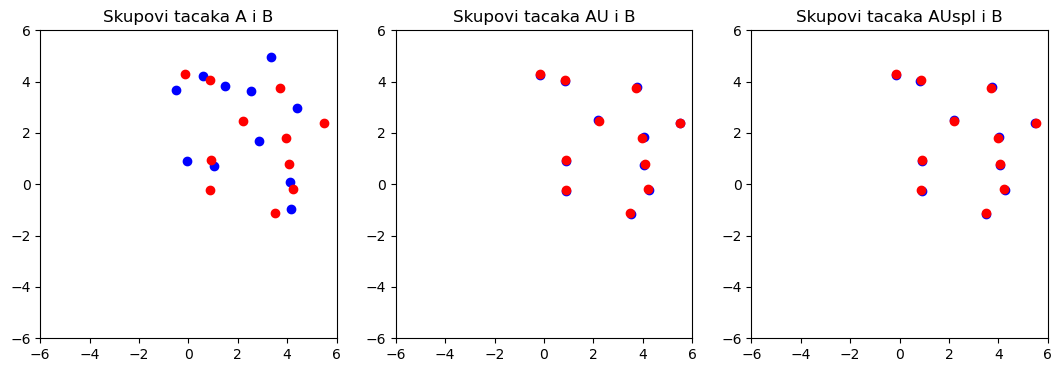

In [29]:
slika, ax = plt.subplots(1, 3,figsize=(13,4)) 

plt.subplot(1, 3, 1)
plt.title("Skupovi tacaka A i B")
plt.plot(A[:,0],A[:,1],'ob')
plt.plot(B[:,0],B[:,1],'or')
plt.xlim([-6,6])
plt.ylim([-6,6])

plt.subplot(1, 3, 2)
plt.title("Skupovi tacaka AU i B")
plt.plot((A@U)[:,0],(A@U)[:,1],'ob')
plt.plot(B[:,0],B[:,1],'or')
plt.xlim([-6,6])
plt.ylim([-6,6])

plt.subplot(1, 3, 3)
plt.title("Skupovi tacaka AUspl i B")
plt.plot((A@Uspl)[:,0],(A@Uspl)[:,1],'ob')
plt.plot(B[:,0],B[:,1],'or')
plt.xlim([-6,6])
plt.ylim([-6,6]);

Следећу конфигурацију формирамо само пермутацијом редоследа тачака и додавањем Гаусовог шума.

In [30]:
m, n= 11 , 2   #dvodimenzionalna konfiguracija
A=rndm.uniform(-1,5,(m,n))
perm=rndm.permutation(m)
B=A[perm]+0.3*rndm.randn(m,n)
C=A.T@B
X,Sigma,Yt=spl.svd(C)
U=X@Yt
Uspl, _=spl.orthogonal_procrustes(A,B)

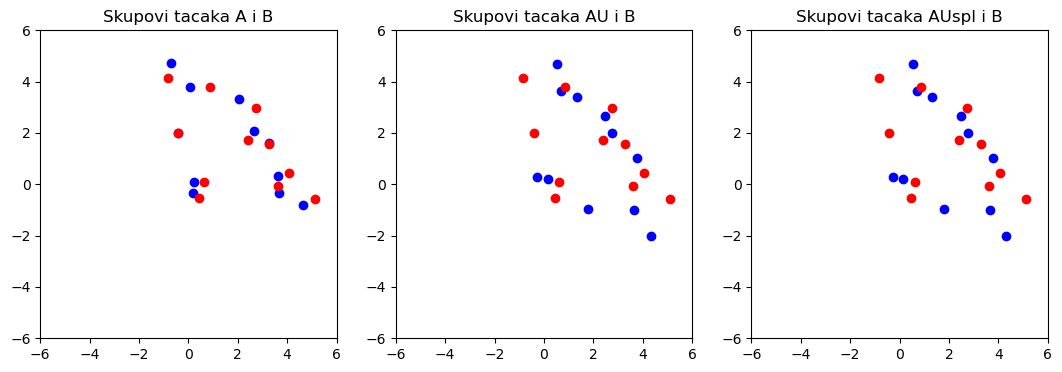

In [31]:
slika, ax = plt.subplots(1, 3,figsize=(13,4)) 

plt.subplot(1, 3, 1)
plt.title("Skupovi tacaka A i B")
plt.plot(A[:,0],A[:,1],'ob')
plt.plot(B[:,0],B[:,1],'or')
plt.xlim([-6,6])
plt.ylim([-6,6])

plt.subplot(1, 3, 2)
plt.title("Skupovi tacaka AU i B")
plt.plot((A@U)[:,0],(A@U)[:,1],'ob')
plt.plot(B[:,0],B[:,1],'or')
plt.xlim([-6,6])
plt.ylim([-6,6])

plt.subplot(1, 3, 3)
plt.title("Skupovi tacaka AUspl i B")
plt.plot((A@Uspl)[:,0],(A@Uspl)[:,1],'ob')
plt.plot(B[:,0],B[:,1],'or')
plt.xlim([-6,6])
plt.ylim([-6,6]);

У наставку креирамо конфигурације у три димензије.

In [32]:
m, n= 11 , 3    #trodimenzionalna konfiguracija
A3=rndm.uniform(-3,3,(m,n))
Q=ortho_group.rvs(n)
B3=A3@Q+0.05*rndm.randn(m,n)
C3=A3.T@B3
X3,Sigma3,Y3t=spl.svd(C3)
U3=X3@Y3t
AT=A3@U3
U3spl, _=spl.orthogonal_procrustes(A3,B3)
A3spl=A3@U3spl

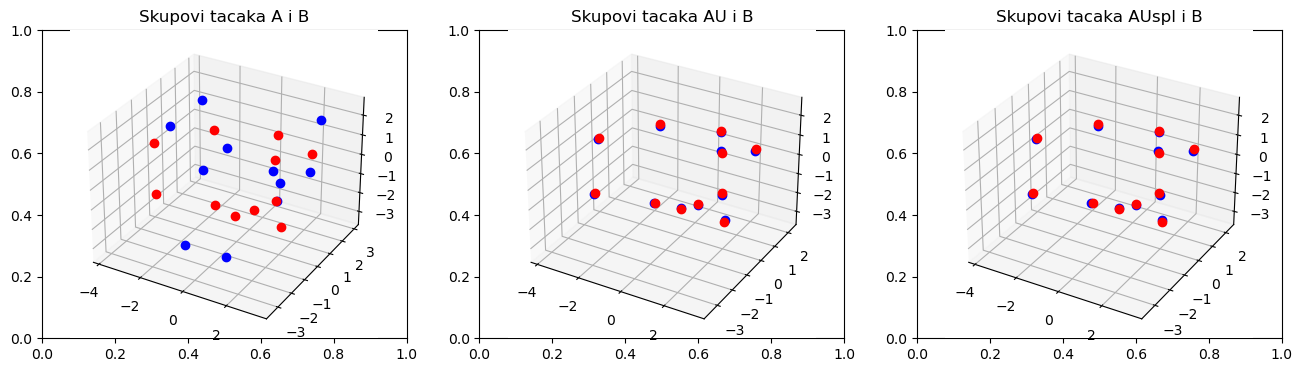

In [33]:
slika, ax = plt.subplots(1, 3,figsize=(16,4)) 

ax = slika.add_subplot(131, projection='3d')
plt.title("Skupovi tacaka A i B")
plt.plot(A3[:,0],A3[:,1],A3[:,2],'ob')
plt.plot(B3[:,0],B3[:,1],B3[:,2],'or')


ax = slika.add_subplot(132, projection='3d')
plt.title("Skupovi tacaka AU i B")
plt.plot(AT[:,0],AT[:,1],AT[:,2],'ob')
plt.plot(B3[:,0],B3[:,1],B3[:,2],'or');

ax = slika.add_subplot(133, projection='3d')
plt.title("Skupovi tacaka AUspl i B")
plt.plot(A3spl[:,0],A3spl[:,1],A3spl[:,2],'ob')
plt.plot(B3[:,0],B3[:,1],B3[:,2],'or');

У следећој конфигурацији извршићемо само пермутацију полазног скупа тачака уз додатак Гаусовог шума координатама.

In [34]:
m, n= 11 , 3    #trodimenzionalna konfiguracija
A3=rndm.uniform(-3,3,(m,n))
perm=rndm.permutation(m)
B3=A3[perm]+0.07*rndm.randn(m,n)
C3=A3.T@B3
X3,Sigma3,Y3t=spl.svd(C3)
U3=X3@Y3t
AT=A3@U3
U3spl, _=spl.orthogonal_procrustes(A3,B3)
A3spl=A3@U3spl

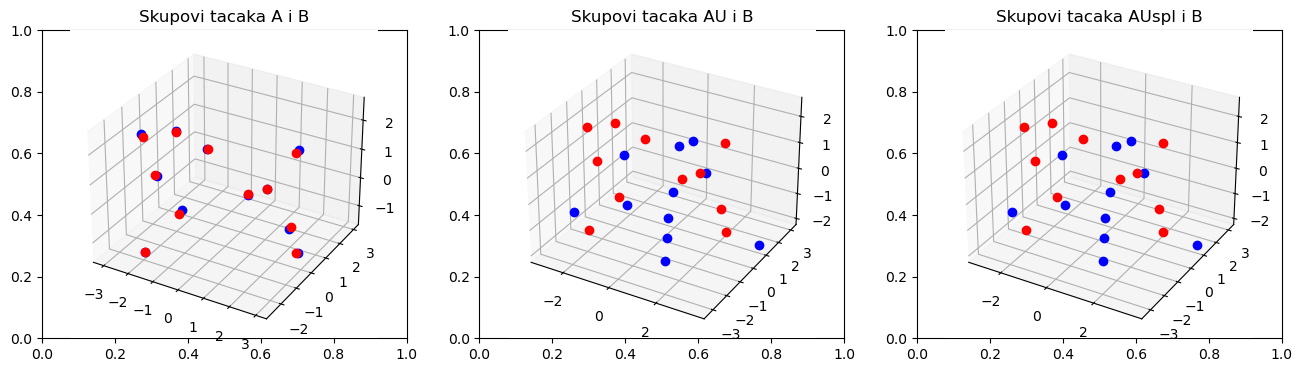

In [35]:
slika, ax = plt.subplots(1, 3,figsize=(16,4)) 

ax = slika.add_subplot(131, projection='3d')
plt.title("Skupovi tacaka A i B")
plt.plot(A3[:,0],A3[:,1],A3[:,2],'ob')
plt.plot(B3[:,0],B3[:,1],B3[:,2],'or')


ax = slika.add_subplot(132, projection='3d')
plt.title("Skupovi tacaka AU i B")
plt.plot(AT[:,0],AT[:,1],AT[:,2],'ob')
plt.plot(B3[:,0],B3[:,1],B3[:,2],'or');

ax = slika.add_subplot(133, projection='3d')
plt.title("Skupovi tacaka AUspl i B")
plt.plot(A3spl[:,0],A3spl[:,1],A3spl[:,2],'ob')
plt.plot(B3[:,0],B3[:,1],B3[:,2],'or');

На овом примеру видимо да поступак не ради најбоље када се примењује само пермутација полазног скупа података.Разлог је што пермутација врста представља ортогоналну трансформацију с лева. Алгоритам не може да адекватно реши проблем јер покушава да слика први вектор у први вектор, итд. Центрирањем и скалирањем података и [додатним техникама](https://en.wikipedia.org/wiki/Generalized_Procrustes_analysis) могу да се добију бољи резултати. У појединим ситуацијама може се додати и услов да ортогонална матрица $Q$ чува оријентацију у простору, тј. да је $\det Q>0.$

***

## Норма трага (Nuclear norm)

За правоугаону матрицу $A\in\mathcal{M}_{m\times n},$ са сингуларним вредностима $\sigma_0,\sigma_1,\dots,\sigma_{r-1},$ $l_1$ варијаната Фробенијусове норме назива се норма трага
$$\|A\|_N=\sigma_0+\sigma_1+\dots+\sigma_{r-1}.$$
Ова норма добија се на основу SVD матрице $A,$ било редуковане, било пуне декомпозиције.
$$
A=U_r\Sigma_{r\times r}V_r^T=\left[\begin{array}{c|c|c}
\phantom{w}&\phantom{w}&\phantom{w}\\
u_0&\dots&u_{r-1}\\ \phantom{w}&\phantom{w}&\phantom{w}
\end{array}\right]
\left[\begin{array}{cccc}
\sigma_0&0&\dots&0\\0&\sigma_1&\dots&0\\&&\ddots&\\0&0&\dots&\sigma_{r-1}
\end{array}\right]
\left[\begin{array}{c}
\phantom{WW}v_0^T\phantom{WW}\\\hline
\vdots\\\hline
\phantom{WW}v_{r-1}^T\phantom{WW}
\end{array}\right]
\quad\Longrightarrow\quad
\|A\|_N={\rm tr}(\Sigma_{r\times r}).
$$

Фробенијусова норма и норма трага су специјални примери $l_p$ норми вектора сингуларних вредности. Ове норме познате су као [Шатен норми](https://en.wikipedia.org/wiki/Matrix_norm#Schatten_norms).
Норма трага представља $l_1$ норму вектора сингуларних вредности матрице $A.$  Због тога је то норма најближа по вредности $l_0$ функцији вектора сингуларних вредности. $l_0$ функција овог вектора даје управо вредност ранга $r$ матрице $A.$ Због тога поступци минимизације по норми трага дају као резултат матрице најмањег ранга.

Видети проблеме [matrix completion](https://en.wikipedia.org/wiki/Matrix_completion), [Netflix prize](https://en.wikipedia.org/wiki/Netflix_Prize) и [matrix regularization](https://en.wikipedia.org/wiki/Matrix_regularization).

На основу познатог односа $l_2$ и $l_1$ норми вектора закључујемо да за сваку матрицу $A$ важи $\|A\|_F\leq\|A\|_N.$
Онда једноставно следи да се и ова норма слаже са векторском нормом $l_2.$
$$\|Av\|\leq\|A\|_F\|v||\leq\|A\|_N\|v\|.$$

**Последица 6.** Норма трага је инваријантна у односу на ортогоналне трансформације.

**Доказ :**

Нека је $A=U\Sigma V^T$ пуна SVD ове матрице и $Q\in\mathcal{M}_{m\times m}$ ортогонална матрица. Тада је $W=QU$ поново ортогонална матрица и $QA=W\Sigma V^T$ је пуна SVD матрице $QA,$ те ове матрице деле сингуларне вредности. Закључујемо да је 
$$\|A\|_N=\|QA\|_N.\quad\Box$$

***

**Пример 12.** Потражимо норму трага матрица $A,QA,AQ,$ где су матрице $A$ и $Q$ случајно генерисане.

In [36]:
m, n= rndm.randint(5,25,2) #trodimenzionalna konfiguracija
m,n

(9, 15)

In [37]:
A=rndm.uniform(-3,3,(m,n))
Q=ortho_group.rvs(m)
np.linalg.norm(A,'nuc'), np.linalg.norm(Q@A,'nuc')

(50.02467917657635, 50.02467917657634)

In [38]:
Q=ortho_group.rvs(n)
np.linalg.norm(A@Q,'nuc')

50.02467917657635

In [39]:
np.sum(spl.svdvals(A))

50.02467917657635

***

**Задатак 1.** Одредити услове под којима за квадратну матрицу $A$ важи $\|A\|_F=\|A\|_N.$

**Решење :**

$$\|A\|_F=\|A\|_N\quad\Longleftrightarrow\quad \sigma_1^2+\sigma_2^2+\dots+\sigma_r^2=(\sigma_1+\sigma_2+\dots+\sigma_r)^2$$
$$\quad\Longleftrightarrow\quad
\sum_{i<j}\sigma_i\sigma_j=0\quad\Longleftrightarrow\quad \sigma_i=0,\ \forall i.$$

***

Име норме $\|\cdot\|_N$ (норма трага) последица је једнакости у наставку.

Нека је $A=U_r\Sigma_{r\times r}V_r^T$ редукована SVD матрице $A\in\mathcal{M}_{m\times n}.$ 
\begin{align}
A^TA&=\big(U_r\Sigma_{r\times r}V_r^T\big)^T\big(U_r\Sigma_{r\times r}V_r^T\big)
=V_r\Sigma_{r\times r}U_r^TU_r\Sigma_{r\times r}V_r^T\\
&=V_r\Sigma_{r\times r}^2V_r^T=\big(V_r\Sigma_{r\times r}V_r^T\big)\big(V_r\Sigma_{r\times r}V_r^T\big)\\
&=B^2.\\
\Longrightarrow&\quad \|A\|_N={\rm tr}(B).
\end{align}

И норма трага има особину суб-мултипликативности, тј. важи
$$\|AB\|_N\leq\|A\|_N\|B\|_N.$$

Због тога се за норму матрица обично даје следећа дефиниција.

**Дефиниција 2.** Функција $\|\cdot\|:\mathcal{M}_{m\times n}\mapsto\mathbb{R}_0^+,\ m,n\in\mathbb{N}$ је матрична норма ако  $\forall A\in\mathcal{M}_{m\times n},\ B\in\mathcal{M}_{n\times p}$ и $\forall c\in\mathbb{R}$ задовољава следеће особине:

|   |   |   |
|---|---|---|
| МН1: |$\|A\|\geq0$ i $\|A\|=0\ \Longleftrightarrow\ A=O,$ | (јединствен минимум ненегативне функције)|
| МН2: |$\|cA\|=|c|\,\|A\|,$ |  (хомогеност)|
| МН3: |$\|A+B\|\leq\|A\|+\|B\|,$| (суб-адитивност)|
| МН4: |$\|A\,B\|\leq\|A\|\,\|B\|.$|  (суб-мултипликативност)|

У наставку упознајемо још једну класу веома значајних норми.

***

## Норма индукована векторском нормом



За Фробенијусову и траг норму показали смо да се слажу са операцијом множења матрице и вектора. Наредна врста норми се управо на томе базира.

**Дефиниција 3.** Матрична норма $\|\cdot\|_p$ индукована векторском нормом $l_p$ дефинисана је са
$$\|A\|_p=\sup_{v\neq\theta}\frac{\|Av\|_p}{\|v\|_p}=\sup_{v\neq\theta}\frac{\left\|A\frac{v}{\|v\|_p}\right\|_p}{\left\|\frac{v}{\|v\|_p}\right\|_p}
	=\max_{\|v\|_p=1}{\|Av\|_p}.
    \tag{4}
$$

***

Другим речима, матрична норма $\|A\|_p,\ A\in\mathcal{M}_{m\times n}$ је најмања ненегативна вредност $C$ за коју важи
$$\|Av\|_p\leq C\|v\|_p,\qquad\mbox{ за сваки вектор } v\in \mathbb{R}^n.$$

Матрична норма описује максимално релативно истезање вектора под дејством матрице $A,$ тј. максимално истезање вектора са јединичне сфере домена. Истезање ових вектора се дешава под дејством матрице $A\in\mathcal{M}_{m\times n},$ мерено одговарајућом векторском нормом. Геометрија јединичне сфере векторског простора условљена је избором векторске норме $l_p.$

Приметимо да вектори $v\in\mathbb{R}^n$ и $Av\in\mathbb{R}^m$ не припадају истим векторским просторима, али се њихова норма израчунава аналогним изразима.

**Лема 2.** За функцију $(4)$ из дефинције 3. важи да се слаже са операцијом множења матрице и вектора.

**Доказ :**

Нека је $v\in \mathbb{R}^n$ произвољан ненула вектор. Тада је
$$ \|Av\|_p\stackrel{v\neq\theta}{=}\dfrac{\|Av\|_p}{\|v\|_p}\|v\|_p
 \leq\left(\sup_{u\neq\theta}\dfrac{\|Au\|_p}{\|u\|_p}\right)\|v\|_p=\|A\|_p\,\|v\|_p.\tag{5}$$

**Теорема 4.** Функција $(4)$ из дефиниције 3. задовољава аксиоме норме матрица.

**Доказ :**

**МН1 :** $\|A\|_p\geq0$ очигледно важи, јер је израз $\|A\|_p$ дат као максимална вредност ненегативних вредности. Покажимо да је $\|A\|_p=0\ \Longleftrightarrow\ A=O.$
$$\|A\|_p=0\ \Longleftrightarrow\ \sup_{v\neq\theta}\dfrac{\|Av\|_p}{\|v\|_p}=0
 \ \Longleftrightarrow\ \|Av\|_p=0,\forall v\in \mathbb{R}^n
 \ \Longleftrightarrow\ Av=\theta,\forall v\in \mathbb{R}^n
 \ \Longleftrightarrow\ A=O.
$$

**МН2 :** $\|\alpha A\|_p=|\alpha|\,\|A\|_p,\ \forall A,\ \forall \alpha$
$$\|\alpha A\|_p=\max_{\|v\|_p=1}{\|\alpha Av\|_p}=\max_{\|v\|_p=1}{|\alpha|\|Av\|_p}=
 |\alpha|\max_{\|v\|_p=1}{\|Av\|_p}=|\alpha|\|A\|_p.
$$

**МН3 :** $\|A+B\|_p\leq\|A\|_p+\|B\|_p,\ \forall A,B$
 \begin{align}
  \|A+B\|_p&=\max_{\|v\|_p=1}{\|(A+B)v\|_p}
 =\max_{\|v\|_p=1}{\|Av+Bv\|_p}\leq\max_{\|v\|_p=1}{\big\{\|Av\|_p+\|Bv\|_p\big\}} \\
 &\leq\max_{\|v\|_p=1}{\|Av\|_p}+\max_{\|v\|_p=1}{\|Bv\|_p}=\|A\|_p+\|B\|_p.
 \end{align}

**МН4 :** $\|AB\|_p\leq\|A\|_p\,\|B\|_p$
\begin{align}
 \|AB\|_p&=\max_{\|v\|_p=1}{\|ABv\|_p}=\max_{\|v\|_p=1}{\|A(Bv)\|_p}
 \stackrel{(5)}{\leq}\max_{\|v\|_p=1}{\|A\|_p\,\|(Bv)\|_p}\\
& =\|A\|_p\max_{\|v\|_p=1}{\|(Bv)\|_p}
 =\|A\|_p\,\|B\|_p.\qquad\Box
 \end{align}

***

Најзначајније индуковане матричне норме су у тесној вези са најчешће коришћеним векторским $l_p$ нормама. 

**Пример 13.** NumPy наредба `linalg.norm` подржава израчунавање индукованих норми. Потражићемо вредности $l_1,l_2,l_{\infty}$ индукованих норми за раније генерисане матрице.

In [40]:
np.linalg.norm(A,1)

15.881838670470747

In [41]:
np.linalg.norm(A,2)

9.888700513641352

In [42]:
np.linalg.norm(A,np.infty)

25.45412964398226

In [43]:
np.linalg.norm(B,1)

24.429276085370855

In [44]:
np.linalg.norm(B,2)

9.38270337040652

In [45]:
np.linalg.norm(B,np.infty)

5.71472939674524

In [46]:
np.linalg.norm(Q,1)

3.3247882959128257

In [47]:
np.linalg.norm(Q,2)

1.0000000000000002

In [48]:
np.linalg.norm(Q,np.infty)

3.4803870329919

***

**Пример 14.** У свакој индукованој матричној норми је $\|I\|_p=1.$
\begin{align}\|I\|_p&=\sup_{v\neq\theta}\dfrac{\|Iv\|_p}{\|v\|_p}=
	\sup_{v\neq\theta}\dfrac{\|v\|_p}{\|v\|_p}=1.
\end{align}

In [49]:
n=rndm.randint(2,254)
np.linalg.norm(np.eye(n),1)

1.0

In [50]:
np.linalg.norm(np.eye(n),2)

1.0

In [51]:
np.linalg.norm(np.eye(n),np.infty)

1.0

In [52]:
np.linalg.norm(np.eye(n),'fro'), n**0.5

(14.696938456699069, 14.696938456699069)

In [53]:
np.linalg.norm(np.eye(n),'nuc'), n

(216.0, 216)

***

Закључујемо да, иако се Фробенијусова норма лакше израчунава, норме индуковане векторском нормом боље описују јединичну матрицу као јединични елемент алгебре матрица. Норма матрица лепо повезује и међусобно инверзне матрице.

**Пример 15.** Нека је $A$ регуларна матрица. За индуковану матричну норму важи да је $$\|A^{-1}\|_p\geq\frac{1}{\|A\|_p}.$$
Нека је $v$ ненула вектор.
$$\|v\|_p=\|A^{-1}Av\|_p\leq\|A^{-1}\|_p\ \|Av\|_p
\leq\|A^{-1}\|_p\ \|A\|_p\ \|v\|_p\qquad \big|:\|v\|_p$$
$$\Longrightarrow\ 1\leq\|A^{-1}\|_p\ \|A\|_p\ \Longrightarrow\
\|A^{-1}\|_p\geq\dfrac{1}{\|A\|_p}.$$

In [54]:
M=rndm.uniform(-1,2,(12,12))
np.linalg.matrix_rank(M)

12

In [55]:
np.linalg.norm(M,1)*np.linalg.norm(np.linalg.inv(M),1)>=1

True

In [56]:
np.linalg.norm(M,2)*np.linalg.norm(np.linalg.inv(M),2)>=1

True

In [57]:
np.linalg.norm(M,np.inf)*np.linalg.norm(np.linalg.inv(M),np.inf)>=1

True

In [58]:
np.linalg.norm(M,'fro')*np.linalg.norm(np.linalg.inv(M),'fro')>=1

True

In [59]:
np.linalg.norm(M,'nuc')*np.linalg.norm(np.linalg.inv(M),'nuc')>=1

True

Размислити због чега аналогна неједнакост важи и за Фробенијусову и траг норму.

За норму инверзне матрице $A^{-1}$ регуларне матрице $A$ можемо да добијемо и бољи резултат.
$$\frac1{\|A^{-1}\|_p}=
	\frac1{\sup_{v\neq\theta}\frac{\|A^{-1}v\|_p}{\|v\|_p}}
	=\inf_{v\neq\theta}\frac{\|v\|_p}{\|A^{-1}v\|_p}
	=\inf_{v\neq\theta}\frac{\|AA^{-1}v\|_p}{\|A^{-1}v\|_p}.$$
Уведимо ознаку $u=A^{-1}v.$ С обзиром да је $A$ регуларна матрица то је $$v\neq\theta\Longleftrightarrow\ A^{-1}v\neq\theta
	\Longleftrightarrow\ u\neq\theta.$$ Претходна једнакост тада постаје
$$
	\frac1{\|A^{-1}\|_p}=\inf_{u\neq\theta}\frac{\|Au\|_p}{\|u\|_p}
	=\min_{\|u\|_p=1}\|Au\|_p.
$$
Другим речима, вредност $\dfrac1{\|A^{-1}\|}$ нам показује у којој мери регуларна матрица $A$ највише контрахује векторе са јединичне сфере.

***

**Пример 16.** Сличан резултат добијамо за Мур-Пенроузов инверз матрица. Подсетимо се да су матрице $AA^+$ i $A^+A$ ортогоналне пројекције. Спектар ових матрица тада чине само 0 и 1, па је $\rho(AA^+)=\rho(A^+A)=1.$ За све субмултипликативне норме, самим тим и за индуковане норме, показали смо (последица 4) да важи
$\|X\|\geq\rho(X),$ за квадратне матрице $X.$ Одатле је
$$1\leq\|AA^+\|\leq\|A\|\,\|A^+\|\qquad\Longrightarrow\qquad \|A^+\|\geq\dfrac{1}{\|A\|}\,.$$

In [60]:
m, n= rndm.randint(5,25,2)
A=rndm.rand(m,n)
Amp=np.linalg.pinv(A)

In [61]:
np.linalg.norm(Amp,'fro')>=1/np.linalg.norm(A,'fro')

True

In [62]:
np.linalg.norm(Amp,'nuc')>=1/np.linalg.norm(A,'nuc')

True

In [63]:
np.linalg.norm(Amp,1)>=1/np.linalg.norm(A,1)

True

In [64]:
np.linalg.norm(Amp,2)>=1/np.linalg.norm(A,2)

True

In [65]:
np.linalg.norm(Amp,np.inf)>=1/np.linalg.norm(A,np.inf)

True

***

Упознаћемо начин израчунавања најзначајнијих матричних $l_p$ норми.

|   |
|---|
|$$l_1:\ \|A\|_1=\sup_{v\neq\theta}\dfrac{\|Av\|_1}{\|v\|_1}=\max_{\|v\|_1=1}{\|Av\|_1}$$|

Да бисмо извели  израз за рачунање $l_1$ матричне норме уведимо ознаке колона матрице $A\in\mathcal{M}_{n\times n}$ и ознаке компоненти јединичног вектора $v\in\mathbb{R}^n.$
$$A=\left[\begin{array}{c|c|c|c}
	\phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}\\
	a_0&a_1&\dots&a_{n-1}\\ \phantom{w}&\phantom{w}&\phantom{w}&\phantom{w}
	\end{array}\right],\qquad v=\begin{bmatrix} x_0\\x_1\\\vdots\\x_{n-1}\end{bmatrix}.$$

Како је $\|v\|_1=1\ \Longleftrightarrow\ \displaystyle\sum_{i\in(n)}|x_i|=1,$ то је
$$\|Av\|_1=\left\|\sum_{i\in(n)}x_ia_i\right\|_1\stackrel{\mbox{МН3}}{\leq}
	\sum_{i\in(n)}\|x_ia_i\|_1\stackrel{\mbox{МН2}}{=}
	\sum_{i\in(n)}|x_i|\,\|a_i\|_1\leq\max_i\|a_i\|_1\sum_{i\in(n)}|x_i|=\max_i\|a_i\|_1.$$
Због тога за матрицу $A=[a_{ij}]$ важи
$$	\|A\|_1=\max_{\|v\|_1=1}{\|Av\|_1}=\max_i\|a_i\|_1
	=\max_i\sum_{j\in(n)}|a_{ji}|.
$$
Закључујемо да	$l_1$ матрична норма представља максималну суму модула компоненти вектора-колона матрице $A.$ 

In [66]:
np.linalg.norm(A,1)

6.189300546354074

In [67]:
np.max(np.linalg.norm(A,1,axis=0))

6.189300546354074

|   |
|---|
|$$l_2:\ \|A\|_2=\sup_{v\neq\theta}\dfrac{\|Av\|_2}{\|v\|_2}=\max_{\|v\|_2=1}{\|Av\|_2}$$|

Нека су $\sigma_0\geq\sigma_1\geq\dots\geq\sigma_{r-1}>0$ све сингуларне вредности матрице $A.$
На основу показаних тврђења за сингуларне вредности и векторе матрице закључујемо да је $\|A\|_2=\sigma_0$ максимална сингуларна вредност. 

In [68]:
np.linalg.norm(A,2)

7.585336800740991

In [69]:
sigmaA=spl.svdvals(A)
np.max(sigmaA)

7.585336800740991

|   |
|---|
|$$l_{\infty}:\ \|A\|_{\infty}=\sup_{v\neq\theta}\dfrac{\|Av\|_{\infty}}{\|v\|_{\infty}}=\max_{\|v\|_{\infty}=1}{\|Av\|_{\infty}}$$|

Нека је $v\in\mathbb{R}^n$ јединични вектор у односу на $l_{\infty}$ норму, 
$$\|v\|_{\infty}=\max_{j\in(n)}|x_j|=1.$$
Посматрамо поделу матрице $A$ на векторе-врста,
$A=\begin{bmatrix} \underline{\phantom{WW}a_0^T\phantom{WW}}\\
	\underline{\phantom{WW}a_1^T\phantom{WW}}\\\vdots\\\overline{\phantom{WW}a_{m-1}^T\phantom{WW}}\end{bmatrix}.$
Тада је
\begin{align}\|Av\|_{\infty}&=\left\|\begin{bmatrix} a_0^Tv\\a_1^Tv\\\vdots\\a_{m-1}^Tv\end{bmatrix}\right\|_{\infty}
=\max_{i\in(m)}\big|a_i^Tv\big|=\max_{i\in(m)}\left|\displaystyle\sum_{j\in(n)} a_{ij}x_j\right|\leq
	\max_{i\in(m)}\displaystyle\sum_{j\in(n)}|a_{ij}x_j|\\
	&=\max_{i\in(m)}\displaystyle\sum_{j\in(n)}|a_{ij}|\,|x_j|
    \stackrel{|x_j|\leq1}{\leq}\max_{i\in(m)}\displaystyle\sum_{j\in(n)}|a_{ij}|
	.\end{align}
$l_{\infty}$ матрична норма матрице $A$ представља максималну суму апсолутних вредности компоненти вектора-врста матрице $A.$

In [70]:
np.linalg.norm(A,np.inf)

14.533875525642014

In [71]:
np.max(np.linalg.norm(A,1,axis=1))

14.533875525642014

***

**Пример 17.** Показаћемо како се још индукована норма матрица слаже са нормом вектора. За векторе $v,u\in\mathbb{R}^n$ сматраћемо да је $v^T\in\mathcal{M}_{1\times n}$ матрица чију норму рачунамо.
\begin{align}
\|v^T\|_2&=\max_{\|u\|_2=1}\|v^Tu\|_2=\max_{\|u\|_2=1}|v^Tu|\stackrel{Коши-Шварц}{\leq}
\max_{\|u\|_2=1}\|v\|_2\|u\|_2=\|v\|_2.
\end{align}

***

**Пример 18.** Нека је $A\in\mathcal{M}_{n\times n}$ регуларна квадратна матрица и $\sigma_0\geq\sigma_1\geq\dots\geq\sigma_{n-1}>0$ све сингуларне вредности матрице $A.$ Тада су сингуларне вредности њене инверзне матрице $A^{-1}$ једнаке
$$\frac1{\sigma_{n-1}}\geq\dots\geq\frac1{\sigma_1}\geq\frac1{\sigma_0}\,.$$ 
Тада је 
$$\|A\|_2=\sigma_0,\qquad \|A^{-1}\|_2=\frac1{\sigma_{n-1}}\,.$$ 

In [72]:
np.linalg.norm(np.linalg.inv(M),2)

2.5006229204646715

In [73]:
sigmaM=spl.svdvals(M)
np.max(1/sigmaM)

2.500622920464673

***

**Пример 19.** Нека је $A\in\mathcal{M}_{m\times n}$ матрица ранга $r$ и $\sigma_0\geq\sigma_1\geq\dots\geq\sigma_{r-1}>0$ све сингуларне вредности матрице $A.$ Тада су сингуларне вредности њене псеудо инверзне матрице $A^{+}$ једнаке
$$\frac1{\sigma_{r-1}}\geq\dots\geq\frac1{\sigma_1}\geq\frac1{\sigma_0}>0\,.$$ 
Тада је 
$$\|A\|_2=\sigma_0,\qquad \|A^{+}\|_2=\frac1{\sigma_{r-1}}\,.$$ 

In [74]:
np.linalg.norm(np.linalg.pinv(A),2)

1.309867108021465

In [75]:
sigmaA=spl.svdvals(A)
np.max(1/sigmaA)

1.309867108021465

***

**Пример 20.** Имајући у виду да је Еуклидова норма инавријантна у односу на ортогоналне трансформације, закључујемо да то важи и за матричну $l_2$ норму.

In [76]:
m, n= rndm.randint(5,25,2) #trodimenzionalna konfiguracija
A=rndm.uniform(-3,3,(m,n))
B=rndm.uniform(-3,3,(n,m))
Q=ortho_group.rvs(n)

In [77]:
np.linalg.norm(B)-np.linalg.norm(Q@B)

-3.552713678800501e-15

In [78]:
np.linalg.norm(A)-np.linalg.norm(A@Q)

3.552713678800501e-15

***

## Кондициони број матрице

Норма матрица игра велику улогу у испитивању стабилности поступка израчунавања неке вредности. У те сврхе користићемо основне појмове теорије грешака.

**Дефиниција 4.** Апроксимација вектора вредности $a=\begin{bmatrix} a_0&a_1&\dots&a_{n-1}\end{bmatrix}^T\neq\theta$ је неки вектор $v=\begin{bmatrix} x_0&x_1&\dots&x_{n-1}\end{bmatrix}^T.$ Апсолутна грешка ове апроксимације је међусобно растојање два вектора, тј.
$$\Delta a=\|v-a\|.$$  
Релативну грешку апроксимације представља количник 
$$\delta a=\dfrac{\Delta a}{\|a\|}.$$

***

Сви изрази из дефиниције 4 могу да користе било коју норму вектора. Уколико се користи нека од стандардних $l_p$ норми, граница релативне грешке $\delta a=\dfrac{\Delta a}{\|a\|}\leq\dfrac12\cdot10^{-p}$ може да се тумачи да компоненте $x_k\approx\|v\|$ имају око $p$ тачних значајних цифара. За мање компоненте $x_k<<\|v\|$ ова граница представља тек границу апсолутне грешке.

У реалним ситуацијама тачан вектор $a$ нам углавном није познат, па самим тим нисмо у могућности да одредимо апсолутно и релативно одступање апроксимације $x.$ Тада баратамо само границама апсолутне и релативне грешке.

**Дефиниција 5.** Број $\Delta$ је граница апсолутне грешке апроксимације $x$ тачног вектора вредности $a,$ уколико је $\Delta a\leq\Delta.$ Слично, $\delta$ је граница релативне грешке када важи $\delta a\leq\delta.$

***

Претпоставимо да је потребно израчунати производ $Av,$ при чему вектор $v$ није тачно дат. То може бити последица грешака заокруживања, мерења или претходних нумеричких израчунавања. Уместо са тачним низом вредности $v$ располажемо његовом апроксимацијом $v+\varepsilon.$ Граница апсолутне грешке улазних података дата је са $\Delta v=\|\varepsilon\|.$ Желимо да проценимо утицај ове грешке на исход израчунавања $Av.$ Потражимо границу апсолутне грешке резултата израчунавања
		$$\Delta(Av)=
		\|A(v+\varepsilon)-Av\|=\|A\varepsilon\|\leq\|A\|\ \|\varepsilon\|=\|A\|\Delta v.$$
Видимо да норма матрице представља грубу процену коефицијента пропорционалности између граница две апсолутне грешке - израчунавања $Av$ и улазног податка $v.$ 		

За процену релативне грешке резултата $\delta( Av)=\dfrac{\|A(v+\varepsilon)-Av\|}{\|Av\|}=\dfrac{\Delta(Av)}{\|Av\|}$ у односу на релативну грешку улаза $\delta v=\dfrac{\|\varepsilon\|}{\|v\|}=\dfrac{\Delta v}{\|v\|}$ претпоставићемо да је матрица $A$ квадратна и регуларна. У том случају имамо
$$\delta( Av)=\dfrac{\Delta(Av)}{\|Av\|}\leq\dfrac{\|A\|\ \Delta v}{\|Av\|}=\dfrac{\|A\|\ \|A^{-1}\|\ \Delta v}{\|A^{-1}\|\ \|Av\|}.$$	
$$\|A^{-1}\|\ \|Av\|\geq\|A^{-1}Av\|=\|v\|\Longrightarrow\ 
		\dfrac{1}{\|A^{-1}\|\ \|Av\|}\leq\dfrac{1}{\|v\|}.$$
$$\Longrightarrow\ \dfrac{\|A(v+\varepsilon)-Av\|}{\|Av\|}\leq
		\|A\|\ \|A^{-1}\|\dfrac{\Delta v}{\|v\|}
		=\|A\|\ \|A^{-1}\|\ \delta v.$$

Граница релативне грешке израчунавања $\delta( Av)=\dfrac{\|A(v+\varepsilon)-Av\|}{\|Av\|}$ пропорционална је граници релативне грешке улазних података $\delta v=\dfrac{\|\varepsilon\|}{\|v\|}.$  Горња граница коефицијента пропорционалности дата је изразом 
$$\kappa(A)=\|A\|\ \|A^{-1}\|\geq1=\kappa(I)$$
и назива се [кондициони број](https://en.wikipedia.org/wiki/Condition_number) матрице $A.$ Овај број даје грубу процену коефицијента увећања релативне грешке у израчунавањима.
		

На сличан начин изводимо кондициони број произвољне правоугаоне матрице користећи Мур-Пенроузов инверз. Користимо неједнакости
$$\|A^+Av\|\leq\|A^+\|\,\|Av\|\qquad\Longrightarrow\qquad \dfrac{1}{\|A^+\|\,\|Av\|}\leq\dfrac{1}{\|A^+Av\|},$$
$$\|A^+A\|\geq1\qquad\Longrightarrow\qquad \|A^+Av\|\geq\|v\|
\qquad\Longrightarrow\qquad \dfrac{1}{\|A^+Av\|}\leq\dfrac{1}{\|v\|}\,.$$

Због тога је 
$$\delta( Av)=\dfrac{\Delta(Av)}{\|Av\|}\leq\dfrac{\|A\|\ \Delta v}{\|Av\|}=\dfrac{\|A\|\ \|A^+\|\ \Delta v}{\|A^+\|\ \|Av\|}\leq\dfrac{\|A\|\ \|A^+\|\ \Delta v}{\|A^+Av\|}
\leq\dfrac{\|A\|\ \|A^+\|\ \Delta v}{\|v\|}=\|A\|\ \|A^+\|\ \delta v.$$

$$\kappa(A)=\|A\|\ \|A^+\|\geq1=\kappa(I)$$

Уколико се за $\kappa(A)$ користи  $l_2$ норма матрица тада је
$$\kappa(A)=\|A\|\ \|A^+\|=\dfrac{\sigma_0}{\sigma_{r-1}}\,,$$
где су $\sigma_0$ и $\sigma_{r-1}$ највећа и најмања сингуларна вредност матрице $A.$

**Пример 21.** Израчунавање кондиционог броја матрице у NumPy-у обавља наредба `linalg.cond`.

In [79]:
A=rndm.uniform(-3,3,(m,n))
np.linalg.cond(A)   

6.161972771421108

In [80]:
B=rndm.uniform(-3,3,(n,n))
np.linalg.cond(B,1)   #samo za kvadratne matrice

389.95603404740285

In [81]:
np.linalg.cond(B,np.inf)   #samo za kvadratne matrice

390.3367671465725

In [82]:
np.linalg.cond(B,'fro')   #samo za kvadratne matrice

226.3341663545325

***

**Пример 22.** Дат је систем једначина $Ax=b$ где су $A=\begin{bmatrix}1&1&1\\2&3&4\\3+\epsilon&4&5\end{bmatrix},$ 
$b=\begin{bmatrix}6\\20\\26+\epsilon\end{bmatrix}$ и $\epsilon$ је параметар чију ћемо вредност да варирамо. Показаћемо прво да је вектор $x=\begin{bmatrix}1\\2\\3\end{bmatrix}$ решење датог система без обзира на вредност параметра $\epsilon.$

$$Ax=\begin{bmatrix}1&1&1\\2&3&4\\3+\epsilon&4&5\end{bmatrix}
\begin{bmatrix}1\\2\\3\end{bmatrix}=\begin{bmatrix}6\\20\\26+\epsilon\end{bmatrix}=b.$$

Приметимо да је матрица $A$ регуларна за све ненула вредности параметра.
$$\begin{vmatrix}1&1&1\\2&3&4\\3+\epsilon&4&5\end{vmatrix}=
\begin{vmatrix}1&1&1\\0&1&2\\\epsilon&1&2\end{vmatrix}=\begin{vmatrix}1&1&1\\0&1&2\\\epsilon&0&0\end{vmatrix}=
\epsilon\begin{vmatrix}1&1\\1&2\end{vmatrix}=\epsilon.$$

Потражићемо решење датог система за $\epsilon\in\{10^{-5},10^{-8},10^{-11}\}.$

In [83]:
epsl=1e-5
A=np.array([[1,1,1],[2,3,4],[3+epsl,4,5]])
resenje=np.array([1,2,3])
b=np.array([6,20,26+epsl])
np.linalg.cond(A)

3836733.3488375545

In [84]:
np.linalg.cond(A,1)

4000069.999976148

In [85]:
np.linalg.cond(A,np.infty)

7200041.999987065

In [86]:
x=np.linalg.solve(A,b)
x

array([1., 2., 3.])

In [87]:
Delta_x=np.linalg.norm(x-resenje)
Delta_x

8.232699664779534e-11

In [88]:
rel_x=Delta_x/np.linalg.norm(x)
rel_x

2.2002815367009783e-11

In [89]:
Delta_b=np.linalg.norm(b-A@x)
Delta_b

0.0

In [90]:
rel_b=Delta_b/np.linalg.norm(b)
rel_b

0.0

In [91]:
epsl=1e-8
A=np.array([[1,1,1],[2,3,4],[3+epsl,4,5]])
resenje=np.array([1,2,3])
b=np.array([6,20,26+epsl])
np.linalg.cond(A)

3836714520.6787343

In [92]:
np.linalg.cond(A,1)

4000000048.182666

In [93]:
np.linalg.cond(A,np.inf)

7200000002.7288

In [94]:
x=np.linalg.solve(A,b)
x

array([1.00000005, 1.99999989, 3.00000005])

In [95]:
Delta_x=np.linalg.norm(x-resenje)
Delta_x

1.28861266278306e-07

In [96]:
rel_x=Delta_x/np.linalg.norm(x)
rel_x

3.443962205994765e-08

In [97]:
Delta_b=np.linalg.norm(b-A@x)
Delta_b

0.0

In [98]:
rel_b=Delta_b/np.linalg.norm(b)
rel_b

0.0

In [99]:
epsl=1e-11
A=np.array([[1,1,1],[2,3,4],[3+epsl,4,5]])
resenje=np.array([1,2,3])
b=np.array([6,20,26+epsl])
np.linalg.cond(A)

3836258407212.924

In [100]:
x=np.linalg.solve(A,b)
x

array([1.00009992, 1.99980016, 3.00009992])

In [101]:
Delta_x=np.linalg.norm(x-resenje)
Delta_x

0.000244750628638865

In [102]:
rel_x=Delta_x/np.linalg.norm(x)
rel_x

6.541235682892722e-05

In [103]:
Delta_b=np.linalg.norm(b-A@x)
Delta_b

0.0

In [104]:
rel_b=Delta_b/np.linalg.norm(b)
rel_b

0.0

Кроз пример примећујемо повећање кондиционог броја матрице као и повећање грешке у добијеном резултату решења. Са друге стране резидуални вектор не бележи никакав проблем. То је управо последица израчунавања са матрицом великог кондиционог броја. За нумеричка израчунавања пожељно је да матрица има кондициони број близак вредности $1.$ 

То уочавамо и на следећем примеру система једначина.

In [105]:
A=np.array([[888445.,887112],[887112,885781]])
b=np.array([1,0])
resenje=np.array([885781,-887112.])
np.linalg.cond(A)

3148008222834.903

In [106]:
x=np.linalg.solve(A,b)
x

array([ 885803.84094839, -887134.87526985])

In [107]:
Delta_b=np.linalg.norm(b-A@x)
Delta_b

0.0

In [108]:
A@resenje-b

array([0., 0.])

***

Претпоставимо да је неким поступком добијена апроксимација $x_k$ решења $x=A^{-1}b$ система линеарних једначина $Ax=b.$ Резидуални вектор $r=b-Ax_k$ је једина процена квалитета апроксимације коју имамо, тј. процена грешке $\varepsilon_k=x-x_k.$
Како је $r_k=b-Ax_k=Ax-Ax_k=A\varepsilon_k,$ то је $\varepsilon_k=A^{-1}r_k\quad\Longrightarrow\quad \|\varepsilon_k\|\leq\|A^{-1}\|\,\|r_k\|.$

Аналогне релације добијамо и за решење најмањих квадрата.

Релативне грешке, као што смо видели у претходној анализи, повезује релација $\delta x\leq\kappa(A)\delta(b).$ Уколико желимо да поправимо апроксимацију $x_k$ применимо исти поступак решавања на систем једначина $A\varepsilon_k=r_k,$ и креирамо нову апроксимацију $x_{k+1}=x_k+\epsilon_k.$ Уколико је $x_k$ добијено као резултат неког тачног метода, да би се поправила апроксимација решења потребно је повећати радну прецизност рачунара.

Претпоставка је да је релативна грешка $\delta(b)$ тачног метода реда величине машинског епсилон $\epsilon_M.$ Због тога је процена релативне грешке апроксимације $\delta x\leq\kappa(A)\epsilon_M.$ Према томе број тачних значајних цифара $m$ је највећи природан број за који важи $\kappa(A)\epsilon_M\leq\dfrac12\cdot10^{-m}.$

Једно од правила из праксе, тј. емпиријско правило каже да уколико у израчунавању учествује матрица $A,$ процена је да се у поступку губи отприлике $\log_{10}\kappa(A)$ тачних значајних цифара.

**Пример 23.** У колико значајних цифара можемо имати поверења у поступку решавања система линеарних једначина $Ax=b,$ 
$$A=\begin{bmatrix}1&2\\2&3.999\end{bmatrix}?$$

Одредићемо кондициони број матрице $A.$

In [109]:
A=np.array([[1,2],[2,3.999]],np.dtype('float32'))
kapa=np.linalg.cond(A)
kapa

24993.812

Уколико претпоставимо да се израчунавања обављају у једнострукој прецизности (23-битна мантиса), машинско епсилон је приближно $\varepsilon_M=2^{-23}\approx10^{-6}.$ 

In [110]:
kapa*2**(-23)

0.002979494631290436

Следи да је $\kappa(A)\epsilon_M\leq\dfrac12\cdot10^{-2}$ па добијени вектор решења има бар две тачне цифре.

In [111]:
resenje=rndm.uniform(-5,5,2).astype('float32')
b=A@resenje
xk=np.linalg.solve(A,b)
xk.dtype

dtype('float32')

In [112]:
xk

array([4.4730377, 0.9327611], dtype=float32)

In [113]:
resenje

array([4.4722943 , 0.93313295], dtype=float32)

Провером тачности рада у аритметици мантисе дужине $16$ (half precission) видимо да она не доноси веће губитке тачности.

In [114]:
kapa*2**(-16)

0.3813753128051758

In [115]:
xk=spl.solve(A.astype('float16'),b.astype('float16'))
xk.dtype

dtype('float32')

In [116]:
xk

array([6.3398438, 0.       ], dtype=float32)

***

**Пример 24.** У колико значајних цифара можемо имати поверења у поступку решавања система линеарних једначина $Ax=b,$ 
$$A=\begin{bmatrix}1&2\\2&3\end{bmatrix}?$$

Одредићемо кондициони број матрице $A.$

In [117]:
A=np.array([[1,2],[2,3]],np.dtype('float32'))
kapa=np.linalg.cond(A)
kapa

17.944271

Уколико претпоставимо да се израчунавања обављају у једнострукој прецизности (23-битна мантиса), машинско епсилон је приближно $\varepsilon_M=2^{-23}\approx10^{-6}.$ 

In [118]:
kapa*2**(-23)

2.139123807864962e-06

Следи да је $\kappa(A)\epsilon_M\leq\dfrac12\cdot10^{-2}$ па добијени вектор решења има бар шест тачних цифара.

In [119]:
resenje=rndm.uniform(-5,5,2).astype('float32')
b=A@resenje
xk=np.linalg.solve(A,b)
xk.dtype

dtype('float32')

In [120]:
xk

array([4.7285595, 2.1451426], dtype=float32)

In [121]:
resenje

array([4.72856  , 2.1451423], dtype=float32)

In [122]:
kapa*2**(-16)

0.00027380784740671515

In [123]:
xk=spl.solve(A.astype('float16'),b.astype('float16'))
xk.dtype

dtype('float32')

In [124]:
xk

array([4.734375, 2.140625], dtype=float32)

***